# Image Thresholding
If value is above, it is object
If it is below or equal, it is background


In [4]:
#Load images
import cv2
import numpy as np
import matplotlib.pyplot as plt


C:\Users\shady\AppData\Local\Temp\ipykernel_35164\4045463020.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  histMaxY = int(hist[histMaxX])
C:\Users\shady\AppData\Local\Temp\ipykernel_35164\4045463020.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p3 = np.array([i,int(hist[i])])


1.266925959940406[ 134 1138][163 166][ 135 1062]
2.7426067655528104[ 134 1138][163 166][136 979]
4.993662712232639[ 134 1138][163 166][137 870]
5.097525960571908[ 134 1138][163 166][138 833]
9.346664001540868[ 134 1138][163 166][139 657]
10.404835115809274[ 134 1138][163 166][140 588]
10.449054122527974[ 134 1138][163 166][141 553]
9.44949890088668[ 134 1138][163 166][142 553]
6.093996135232828[ 134 1138][163 166][143 632]
2.708671248768692[ 134 1138][163 166][144 712]
1.9178708727993967[ 134 1138][163 166][145 705]
2.4814061212144476[ 134 1138][163 166][146 819]
5.866731007678584[ 134 1138][163 166][147 899]
7.164507437422733[ 134 1138][163 166][148 909]
9.476235974716591[ 134 1138][163 166][149 953]
7.493579115329332[ 134 1138][163 166][150 853]
4.228571061099796[ 134 1138][163 166][151 710]
5.198304161930805[ 134 1138][163 166][152 709]
5.45230636331496[ 134 1138][163 166][153 684]
3.7082264704099863[ 134 1138][163 166][154 592]
4.051695034224999[ 134 1138][163 166][155 570]
3.58996

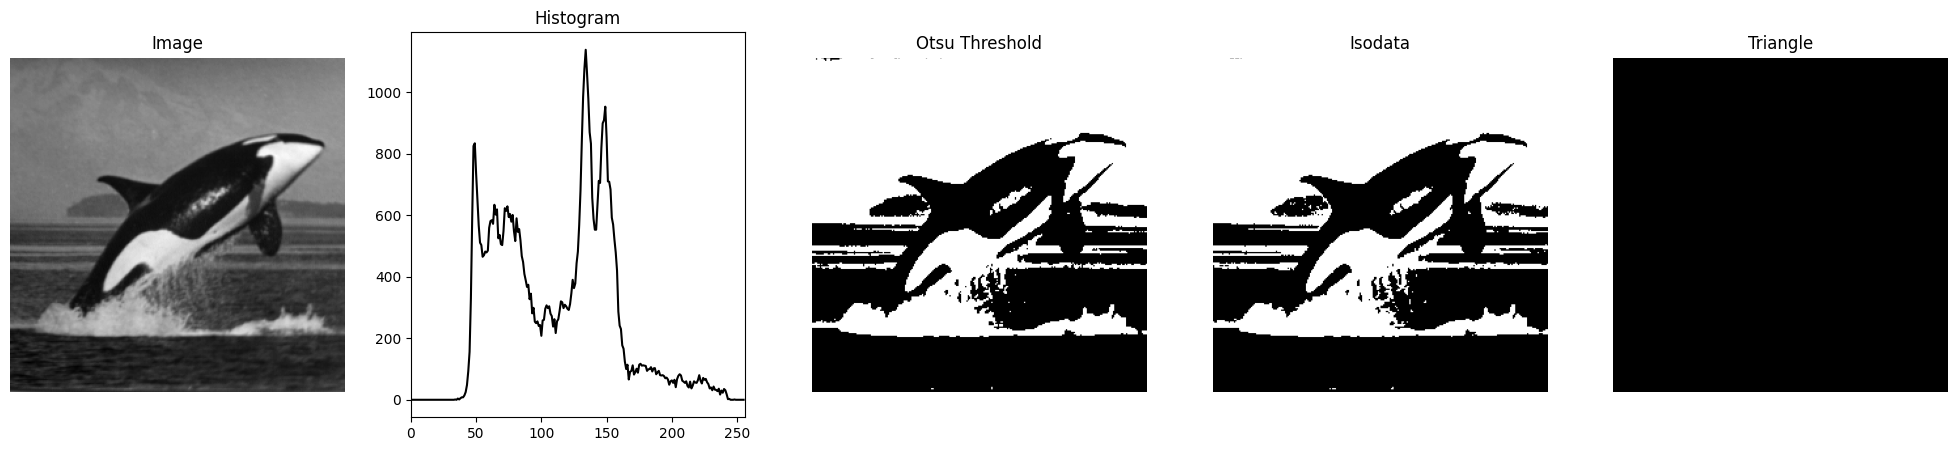

In [24]:
# Hardware image    
img = cv2.imread("Orca.png", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    # print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

### Triangle method
## Find max position of histogram
histMaxX = int(hist.argmax())
histMaxY = int(hist[histMaxX])
p1 = np.array([histMaxX,histMaxY])

## find highest grey value
# Find the indices (bins) where the highest non-zero values occur
non_zero_indices = np.where(hist > 0)
# Find the bin with the highest non-zero value
greyMaxX = 0
for idx, val in enumerate(hist):
    if val > greyMaxX:
        greyMaxX = idx

greyMaxY = int(hist[greyMaxX][0])
p2 = np.array([greyMaxX,greyMaxY])

# find longest perpendicular distance between line and grey value
dist = 0
t_tri = 0
for i in range(histMaxX+1,greyMaxX-1):
    p3 = np.array([i,int(hist[i])])
    d = np.linalg.norm(np.cross(p2-p1, p1-p3))/np.linalg.norm(p2-p1)
    print(str(d) + str(p1) + str(p2) + str(p3))
    if (d > dist):
        t_tri = i
        dist = d

# print(p1)
# print(p2)
print('dist = ' + str(dist) + ' at: ' + str(t_tri))
ret3,th3 = cv2.threshold(img,int(255*t_tri),255,cv2.THRESH_BINARY)

#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(th3, cmap='gray')
ax5.axis('off')


plt.show()



In [ ]:
# Nuclei
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
#Orca
img = cv2.imread("Orca.png", cv2.IMREAD_GRAYSCALE)